<div class="alert alert-block alert-info"> 

### Hidden Layer
Wie in der letzten Stunde besprochen, bilden bisherige Inhalte eine Basis für neuronale Netze. Bisher war jedoch alles einfach sichtbar. Ein Geheimnis aber liegt darin, dass ein großer Teil des neuronalen Netzes von außen nicht sichtbar - also "hidden" ist. Dies wollen wir jetzt behandeln. Dabei helfen auch die Geraden, die wir in der letzten Stunde betrachtet haben.
Die folgenden Aufgaben sollen in Kleingruppen bearbeitet werden. Zwischenergebnisse sollten besprochen werden. Die Leitung der Diskussion sollten Paul/Oliver/Nico übernehmen.

<div class="alert alert-block alert-warning"> 

### Aufgabe 1

Mithilfe der folgenden beiden Blöcke werden Geraden in ein Koordinatensystem gezeichnet. In den letzten Stunden haben wir uns bereits mit ihrer Bedeutung beschäftigt.

[]

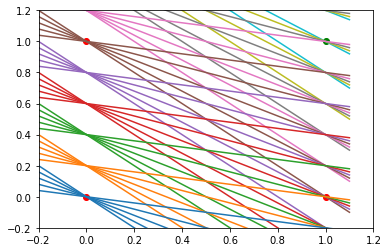

In [2]:
# Zunächst werden Pakete importiert.
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([xmin, xmax])
for a in np.arange(-1, 0, 0.2):
    for b in np.arange(0, 2, 0.2):
        ax.plot(X, a * X + b)

ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()

<div class="alert alert-block alert-warning"> 

### Aufgabe 2
Löse eine der beiden folgenden Aufgaben. Solltest du dir etwas unsicher sein, verwende Version 1. Wenn du dich mit dem Thema vertraut fühlst, bearbeite Version 2.

#### Version 1
1. Zeichne die Geraden mit unterschiedlichen Parametern,
2. Erkläre Verbindungen zwischen den Parametern $w_0, w_1, w_2$ und den Geraden im Graphen.
3. Erkläre, warum $W_1=(-0.5\quad 1 \quad 1)$ und $x_0=1$ eine OR-Funktion und $W_2=(-1.5\quad 1 \quad 1)$ und $x_0=1$ eine AND-Funktion repr"asentieren können.
4. Begründe: "Entweder-oder" bzw. "XOR" lässt sich mithilfe gemeinsamer Anwendung von $W_1$ und $W_2$ beschreiben.
5. Erkläre, dass sich sich XOR mit bisherigen Perzeptronen nicht beschreiben lässt.

#### Version 2
1. Zeichne die Graphen mit unterschiedlichen Parametern.
2. Ziehe Rückschlüsse auf AND und OR. Welche Bedingungen müssen w0, w1 und w2 erfüllen, damit diese Entscheidungen getroffen werden können?
3. Wie lässt sich an diesen Graphen "Entweder-oder" bzw. "XOR" beschreiben?
4. Diskutiere mit deinen Nachbarinnen und Nachbarn über die Darstellung von XOR durch ein Perceptron. Wie lassen sich Mängel beseitigen?

<div class="alert alert-block alert-danger">
    
## Hidden Layers

<div class="alert alert-block alert-danger">
    
Bisherige Ergebnisse sagen aus, dass das Neuron unter Umständen nicht aus einer einzigen Schicht bestehen kann, sondern mehrere Schichten -- sogenannte Layer -- nacheinander durchlaufen werden müssen, wobei unter Umständen mehrere Verbindungen zwischen aufeinander folgende Schichten notwendig sind. Außerdem muss es nicht so sein, dass die Zwischenschritte komplett sichtbar sind. Beispielsweise erscheint bei XOR lediglich das Endergebnis, nicht einer der Zwischenschritte, von Interesse einer außerhalb der XOR-Umgebung liegenden Teile des $\mathbb{R}^2$ abgeschnitten wurde. Solche Schichten sind sogenannte Hidden Layers. Hidden Layers helfen bei der Lösung oben notierter Probleme.

Durch Anwendung von Hidden Layers lassen sich das in Verbindung mit XOR-Operation aufgetretene Problem eines Neurons beseitigen. Analog zu oben betrachten wir bei der Trennung der $x$-$y$-Ebene mithilfe der Geraden $g_1\colon\, x_1 + x_2 =1, \! 5$ und $g_2\colon\, x_1 + x_2 =0, \! 5$. Das Neuron der XOR-Umgebung besitzt dabei die folgende Struktur:

<img src="hidden01.jpg" width=500 height=500 />

mit $W_1^{(1)} = (w_{10}^{(1)} \quad w_{11}^{(1)} \quad w_{12}^{(1)})$ und $\vec{x} = \left( \begin{array}{c} x_{10} \\ x_{11} \\ x_{12} \end{array}\right)$. Zusätzlich gilt
\begin{eqnarray*}
\Sigma_{21} &=& W_1^{(1)} \odot \vec{x}_1 = w_{10}^{(1)} \cdot x_{10} + w_{11}^{(1)} \cdot x_{11} + w_{12}^{(1)} \cdot x_{12} \mbox{ und}
\\
\Sigma_{22} &=& W_2^{(1)} \odot \vec{x}_1 = w_{20}^{(1)} \cdot x_{10} + w_{21}^{(1)} \cdot x_{11} + w_{22}^{(1)} \cdot x_{12} \, .
\end{eqnarray*}
Außerdem sind $\vec{x}_2 = \left(\begin{array}{c} x_{21} \\ x_{21} \\ x_{22} \end{array}\right)$ und $W^{(2)} = \left( w_{10}^{(2)} \quad w_{11}^{(2)} \quad w_{12}^{(2)}  \right)$.
Die Gewichte haben im Neuron folgende Bedeutungen:

1. Die <span style="color:red">roten Gewichte</span> stehen in Verbindung mit dem Bereich <span style="color:red">unterhalb von $g_1\colon\, x_1 + x_2 =1, \! 5$</span>.

2. Die <span style="color:green">grünen Gewichte</span> stehen in Verbindung mit dem Bereich <span style="color:green">oberhalb der Gerade $g_2\colon\, x_1 + x_2 =0, \! 5$</span>.

3. Die <span style="color:blue">blau-farbigen Gewichte</span> Anteil des Graphen befasst sich dann damit, ob die betrachtete Position <span style="color:blue">zwischen den Geraden $g_1$ und $g_2$</span> liegt.


Die Bezeichnungen enthalten hier mehrere Indizes. Bei $x_{ij}$ bezeichnet $i$ den Layer, in dem dieser Eintrag steht. Die $x_{1j}$ sind dabei die Eingänge, die wir bisher einfach durch $x_j$ bezeichnet haben. In Zukunft kommen wir jedoch nicht länger mit einem Index aus. $x_{21}$, $x_{22}$ und $x_{31}$ bezeichnen dabei die gewichteten Summen $\Sigma$ und und die Ausgabefunktionen $f$ der Zwischenschritte, sind daher in einer analogen Box zu früher notiert:
\begin{eqnarray*}
x_{21} &=& f \left( \Sigma_{21} \right)
= f(w_{10}^{(1)} \cdot x_{10} + w_{11}^{(1)} \cdot x_{11} + w_{12}^{(1)} \cdot x_{12} ) \quad\mbox{und}
\\
x_{22} &=& f \left( \Sigma_{22} \right)
= f( w_{20}^{(1)} \cdot x_{10} + w_{11}^{(1)} \cdot x_{11} + w_{22}^{(1)} \cdot x_{12}  )\, .
\end{eqnarray*}
Auf den genauen Aufbau dieser Komponenten werden wir an entsprechenden Stellen genauer eingehen.

Die $w_{ij}^{(k)}$ bezeichnen die Gewichte im Neuron. Dabei bezeichnet $k$ die Nummer des Schritts. Die Schritte sind dabei mit dem Beginn 1 notiert. Der Zähler $j$ steht in Verbindung mit dem Zähler $j$ bei den $x_{ij}$, bei dem $w_{ij}^{(k)}$ \textbf{startet}.
Mit dieser Schreibweise gilt für unser Beispiel:

$x_{10} = x_{20} = 1$ \quad und \quad $x_{11}, x_{12}\in \{0; 1\}$.

Sie lassen sich als Vektoren notieren:
$$
\vec{x}_{1} = \left(\begin{array}{c} x_{10} \\ x_{11} \\ x_{12}\end{array}\right)
\quad \mbox{und}\quad 
\vec{x}_{2} = \left(\begin{array}{c} x_{20} \\ x_{21} \\ x_{22}\end{array}\right).
$$
	
Die Gewichte sind hier gleich:


<span style="color:red">$w_{10}^{(1)}= 1,\! 5$, $w_{11}^{(1)}= -1$, $w_{12}^{(1)}= -1$</span>
    
<span style="color:green">$w_{20}^{(1)}=0,\! 5$, $w_{21}^{(1)}=-1$, $w_{22}^{(1)}=-1$</span>

<span style="color:blue">$w_{10}^{(2)}=-1$, $w_{11}^{(2)}=\frac{2}{3}$, $w_{12}^{(2)}=\frac{2}{3}$</span>


Die zugehörigen Tripel der drei Spalten lassen sich als Vektoren notieren:


<span style="color:red">
$$\vec{w}_1 = \left( w_{10}^{(1)} \quad w_{11}^{(1)} \quad w_{12}^{(1)}\right) = \left( 1,\! 5
\quad
-1
\quad
-1
\right)$$</span>

<span style="color:green">
$$\vec{w}_2 = \left( w_{20}^{(1)} \quad w_{21}^{(1)} \quad w_{22}^{(1)} \right) = \left( 0,\! 5 \quad -1 \quad -1 \right)$$
</span>

<span style="color:blue">
$$\vec{w}_3 = \left( w_{10}^{(2)} \quad w_{11}^{(2)} \quad w_{12}^{(2)} \right) = \textstyle \left(
-1 \quad \frac{2}{3} \quad \frac{2}{3} \right)$$
</span>

<div class="alert alert-block alert-warning"> 

### Aufgabe 3
Schreibe die Summen aus:
$\Sigma_{21} = W_1^{(1)} \odot \vec{x}_1$ und $\Sigma_{22} = W_2^{(1)} \odot \vec{x}_1$, indem du $W_1^{(1)}$ und $W_2^{(1)}$ einsetzt und das Produkt ausmultiplizierst.

<div class="alert alert-block alert-warning"> 

### Aufgabe 4
Die Möglichkeiten für $\vec{x}_1$ lassen sich wie früher tabellarisch notieren:

\begin{equation}
\begin{array}{c|c|c|c|c|c|c}
x_{10} & x_{11} & x_{12} & \Sigma_{21} & x_{21} & \Sigma_{22} & x_{22}
\\
\hline
1 & 0 & 0 & & & &
\\
\hline
1 & 1 & 0 & & & &
\\
\hline
1 & 0 & 1 & & & &
\\
\hline
1 & 1 & 1 & & & &
\end{array}
\end{equation}

a) Ergänze die Tabelle um $\Sigma_{21} = W^{(1)}_1 \odot \vec{x}_1$ und $\Sigma_{22} = W^{(1)}_2 \odot \vec{x}_1$

b) Trage
$$
f(\Sigma) = \left\{ \begin{array}{ll} 0 & \mbox{ für } \Sigma < 0\, , \\ 1 & \mbox{ für } \Sigma \geq 0\, . \end{array}\right.
$$
für $\Sigma_{21}$ und $\Sigma_{22}$ in die Tabelle ein.

c) Führe die Berechnungen aus den Aufgabenteilen a) und b) für das Schema fort und bestimme $a^{ist}$.

d) Ersetze die Aktivierungsfunktion in Teil b) durch die Exponentialfunktion $f_2$ zur Basis 2 mit
$$
f_{2} (x) = \frac{1}{1+ 2^{-x}}\, .
$$
Erkläre die Unterschiede zu den Ergebnissen aus den Teilen b) und c). Wie lässt sich das Ergebnis in die gewünschte Form bringen?


<div class="alert alert-block alert-danger">

### XOR-Operation

Um die XOR-Operation in Python umzusetzen, verwenden wir zum Start des Verfahrens Zufallszahlen für die Gewichtsmatrix.

Wir greifen dabei auf die oben notierte Aktivierungsfunktionen zurück:

$f (x) = \displaystyle \frac{1}{1+2^{-x}}$.

und verzichten auf $x_{10}$.

<div class="alert alert-block alert-warning"> 

### Aufgabe 5
Folge den Schritten 1 bis 7 unten. Veranschauliche dir dabei die einzelnen Schritte.
Was hat dies mit der XOR-Operation zu tun?

<div class="alert alert-block alert-success"> 

##### Bearbeitung von Aufgabe 16

Die folgende Lösung geht auf eine andere Art als oben notiert heran und bietet an, auch Backward zu arbeiten.

1. Zunächst Pakete laden

import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success"> 

2. Definition von Variablen und Parametern des Neurons

In [ ]:
# Hier werden die Input Layer  für XOR definiert:
x = np.array([[0,0,1,1],[0,1,0,1]])
# Die vier Ausgänge der verschiedenen Input Layer können folgendermaßen aussehen:
a_ist = np.array([[0,1,1,0]])
# Es gibt zwei Neuronen x_1 und x_2 bei den Inputs:
n_x = 2
# Es gibt ein Neuron a^ist beim Outputs:
n_ist = 1
# In der Mitte bleibt folgende von Neuronen verborgen (hidden layer):
n_h = 2
# Anzahl der Beispiele zum Trainig:
m = x.shape[1]
# Lernrate
alpha = 0.1
# Zwei Startwerte (seed) werden als Zufallszahlen definiert:
np.random.seed(2)
# Hier werden die Elemente der Gewichtsmatrix W_ist definiert. Es sind Zufallszahlen;
W1 = np.random.rand(n_h,n_x)   # Gewichtsmatrix im Hidden Layer
W2 = np.random.rand(n_ist,n_h)   # Gewichtsmatrix im Output Layer

# Die Matrizen werden ausgegeben
print(W1)
print(W2)

# I didnt use bias units
# We will use this list to accumulate losses
losses = []


<div class="alert alert-block alert-success"> 

3. Exponentialfunktion zur Basis 2 und Sigmoid-Funktion

Die Sigmoind-Funktion $f_{sig}$ ist gegeben durch
$$
f_{sig} = \frac{1}{1+e^{-x}}\, .
$$

Die Exponentialfunktion zur Basis 2 $f_{2}$ ist gegeben durch
$$
f_{2} (x) = \frac{1}{1+ 2^{-x}}\, .
$$
Eigenschaften zeigen sich in den folgenden Graphen. Man beachte Ähnlichkeiten und Unterschiede der Graphen.

In [ ]:
# Exponentialfunktion zur Basis 2
def f_2(z):
    z = 1/(1+2**(-z))
    return z

# Graph zeichnen
X = np.linspace(-3, 3, 200)
Y = f_sig(X)
Z = f_2(X)
plt.plot(X, Y, linewidth=2, label="f_sig")
plt.plot(X, Z, linewidth=2, label="f_2")
plt.legend()
plt.show()

<div class="alert alert-block alert-success"> 

4. Hier wird die Funktion zur Anwendung des Algorithmus aus den letzten Stunden definiert. Er ist zusammengefasst genau der Algorithmus, den ihr schon kennt.

In [ ]:
# Forward Algorithmus mit Exponentialfunktion zur Basis 2
def forward_2(w1,w2,x):
    sigma_1 = np.dot(W1,x) # Anwendung der ersten Gewinnmatrix auf den Input Layer --> Erster Schritt des Hidden Layer
    a1 = f_2(sigma_1)  # Anwendung der Funktion f im Hidden Layer --> manchmal als x_21 bezeichnet
    sigma_2 = np.dot(W2,a1)# Anwendung der zweiten Gewinnmatrix auf den Hidden Layer --> Erster Schritt des Output Layer
    a2 = f_2(sigma_2)  # Anwendung der Funktion f im Output Layer --> manchmal als x_31 bezeichnet
    return sigma_1,a1,sigma_2,a2 # Ausgabe der Parameter

<div class="alert alert-block alert-success"> 

5. Entropie: Hier wird die Entwicklung der Entropie in Verbindung mit mehrfachen Durchlaufs durch das neuronale Netz dargestellt.

Die Entropie zeigt die "Aussagefähigkeit" der Klassifikation an, oder den "Verlust" an Information. Ihre Ausgabe ist eine Wahrscheinlichkeit $p \in [0;1]$ dafür, dass eine korrekte Aussage gemacht wird. Die Entropie steigt, wenn die vorhergesagte Wahrscheinlichkeit vom aktuellen Wert abweicht/divergiert. Da hier der Logarithmus Anwendung findet, ist das Ergebnis besser, je näher es an 0 liegt.

Das NN mit $x$-facher Wiederholung durchlaufen gelassen.

In [ ]:
iterations = 100000
for i in range(iterations):
    z1,a1,z2,a2 = forward_2(W1,W2,x)
    loss = -(1/m)*np.sum(a_ist*np.log2(a2)+(1-a_ist)*np.log2(1-a2)) #Entropie
    losses.append(loss)
    da2,dw2,dz1,dw1 = back_2(m,W1,W2,z1,a1,z2,a2,a_ist)
    W2 = W2-alpha*dw2
    W1 = W1-alpha*dw1

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("Epoche")
plt.ylabel("Verlust value")

<div class="alert alert-block alert-success"> 

Erinnert euch: bestimmt werden sollen Gewichte W1, W2, so dass mit Eingaben entschieden werden kann, ob eine Person eine Spielerin (0) oder ein Spieler (1) ist.
    
6. Hier wird eine Funktion zur Vorhersage definiert. Sie ergibt eine Aussage, ob eine Spielerin oder ein Spieler vorliegt.

In [ ]:
def predict(W1,W2,input):
    z1,a1,z2,a2 = forward_2(W1,W2,test) # Hier im Fall der Potenzfunktion
    #z1,a1,z2,a2 = forward_sig(W1,W2,test) # Hier im Fall der Sigmoidfunktion
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print("Beim Input", [i[0] for i in input], "ist die Ausgabe gleich 1")# ['{:.2f}'.format(i) for i in x])
    else:
        print("Beim Input", [i[0] for i in input], "ist die Ausgabe gleich 0")

<div class="alert alert-block alert-success"> 

7. Diese Funktion findet jetzt Anwendung.

In [ ]:
test = np.array([[1],[0]])
predict(W1,W2,test)
test = np.array([[0],[0]])
predict(W1,W2,test)
test = np.array([[0],[1]])
predict(W1,W2,test)
test = np.array([[1],[1]])
predict(W1,W2,test)